-------------------------------------------------

This notebook is part of the [q4p (Quantum Computing for Programmers) series](https://github.com/CarloLepelaars/q4p). The original notebook can be found on [Github](https://github.com/CarloLepelaars/q4p/blob/main/nbs/00b-marbles.ipynb).

-------------------------------------------------

# 00b. Guessing the number of marbles in a vase

This notebook will give you a high-level overview of a practical problem where we can gain a (quadratic) advantage over classical algorithms using a quantum algorithm. This notebook also provides an outline of the topics discussed in this course. To solve our first problem with a quantum algorithm we are going to guess the number of marbles in a hidden vase. This exercise will show you how to gain a quadratic advantage over classical algorithms with Grover's unstructured search algorithm.


## Problem Outline

# <center>![](https://images.stockcake.com/public/c/4/6/c46c559a-800b-439d-ab95-aa0bc4d73f29_large/colorful-marbles-display-stockcake.jpg)</center>


Imagine your friend has a vase with marbles hidden inside a closet. You can have unlimited guesses at how many marbles are in the vase. Each time you guess your friend will tell you if it is the right answer or not.

Classically you would start going through all the options. $0, 1, 2,$ etc. In the worst case you will end up guessing $n$ times, where $n$ is the number of marbles in the vase. What if I told you that with a quantum algorithm we can guess the number of marbles with only $\sqrt{n}$ guesses? That is, if your friend is part of the quantum system. To solve this problem we will use **Grover's algorithm**, so you can begin to build an intuition of what quantum computing has to offer. The details of the algorithm will be discussed in notebook 5.

Let's say there can be a maximum of $255$ marbles in the vase, which corresponds to $8$ bits of information. Then in the worst case the classical algorithm will have to take $256$ guesses. With a quantum algorithm we can achieve a worst case of approximately $\sqrt{256} = 16$ guesses. We do this by leveraging quantum interference and entanglement. In the quantum context a guess is equal to a **Grover iteration**. We will show that even with only $6$ Grover iterations we are able to solve this search problem on $8$ bits.

# Installation

In [1]:
# Kaleido is used to convert Plotly to static png
!pip install -Uqq kaleido
# skq is used for building quantum circuits;built on NumPy and provides us the glue to convert our quantum circuits to whatever quantum framework we prefer.
!pip install -Uqq skq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
import numpy as np
from skq.circuits import Grover

import plotly.graph_objects as go
# This allows you to play with interactive Plotly plots.
import plotly.io as pio
pio.renderers.default = 'png'

## Building and running Grover's algorithm

In [3]:
n_qubits = 8
# Generate secret random state (vase with marbles in the closet)
target_state = np.zeros((2**n_qubits))
random_index = np.random.randint(2**n_qubits)
target_state[random_index] = 1

In [4]:
# Execute Grover's search algorithm
grover_iterations = 6
grover = Grover().circuit(n_iterations=grover_iterations, 
                          n_qubits=n_qubits, 
                          target_state=target_state)
result = grover(np.array([1]+[0]*(len(target_state)-1)))

Don't worry about the details of the quantum circuit below. In notebook 2 we will learn more about quantum logic gates and how they work in a quantum computer. For now note that each Grover iteration consists of a `PhaseOracle` and a `GroverDiffusion` operator, which we repeat $6$ times. You can view this as $6$ "guesses" of the number of marbles in the vase. The `PhaseOracle` is like your friend that tells you if you got the right answer or not. `GroverDiffusion` amplifies the probability of the correct answer.

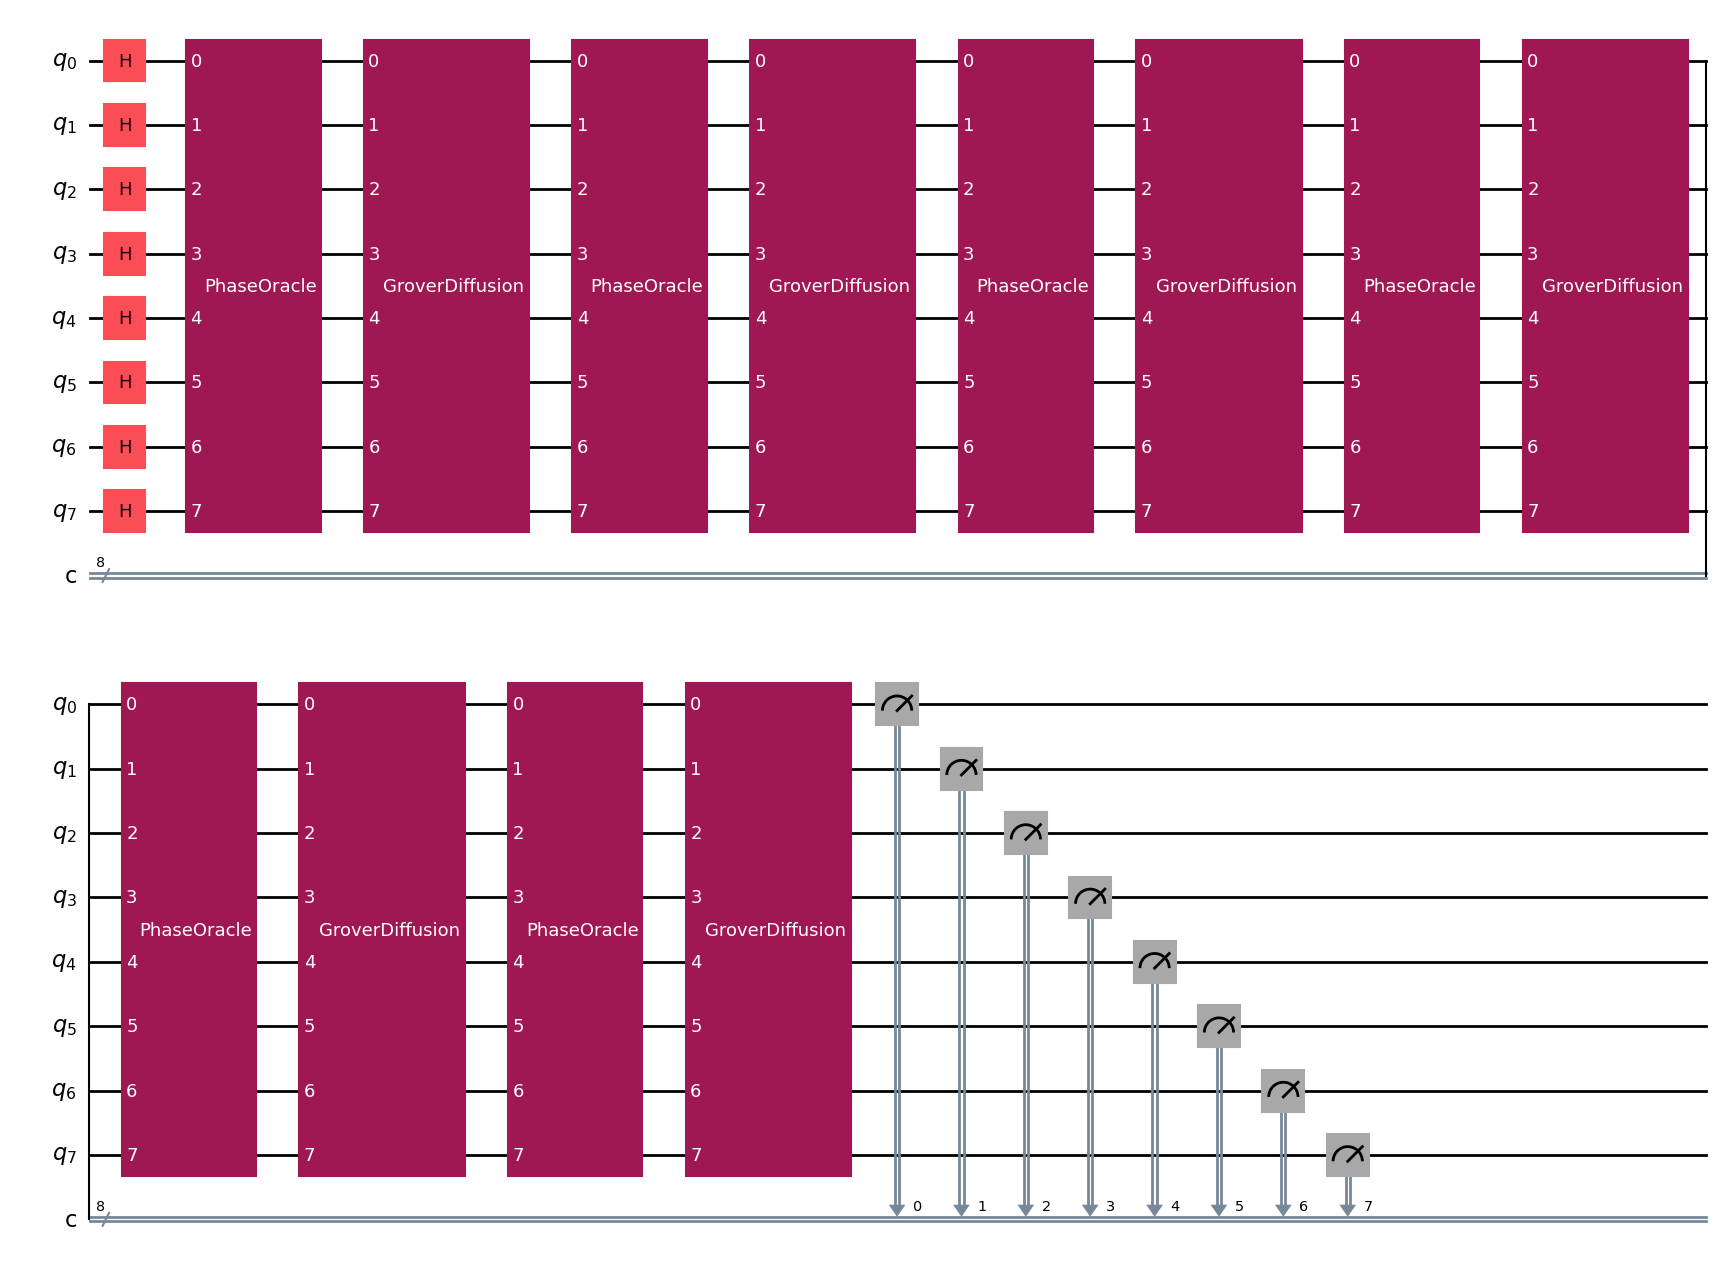

In [5]:
grover.draw(output='mpl')

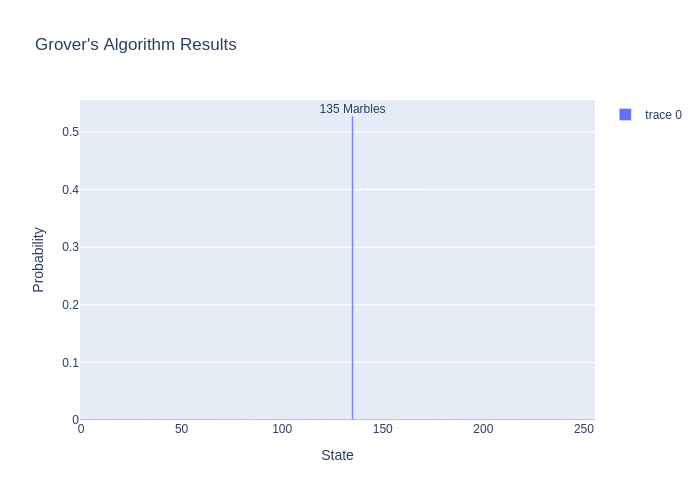

In [6]:
max_idx = np.argmax(result)
max_val = result[max_idx]

fig = go.Figure(data=[
    go.Bar(x=list(range(len(result))), y=result),
    go.Scatter(
        x=[max_idx],
        y=[max_val],
        mode='text',
        text=[f'{max_idx:.0f} Marbles'],
        textposition='top center',
        marker=dict(color='green'),
        showlegend=False
    )
])
fig.update_layout(
    title="Grover's Algorithm Results", 
    xaxis_title="State",
    yaxis_title="Probability"
)
fig.show()

In [7]:
print(f"Guessed number of marbles: '{np.argmax(result.round())}'")
print(f"Number of marbles in the vase: '{np.argmax(target_state)}'")
print(f"Answer is {'correct' if np.argmax(result.round()) == np.argmax(target_state) else 'incorrect'}!")

Guessed number of marbles: '135'
Number of marbles in the vase: '135'
Answer is correct!


Congratulations, you've just built and ran your first quantum algorithm! Note that what we have run here is a classical simulation of the quantum algorithm using NumPy.

## Running algorithms on real quantum hardware


To run the algorithm on a real quantum computer we have to convert the circuit to a quantum computing framework. One popular framework is [IBM's Qiskit](https://www.ibm.com/quantum/qiskit). To convert the circuit we have built to Qiskit we simply call the `convert` method.

In [8]:
qc = grover.convert(framework="qiskit")
qc

Notebook 8 will be all about how to run quantum algorithms on real quantum computers. 

A quadratic advantage over classical algorithms is already pretty cool! Though other algorithms like Shor's algorithm can gain exponential advantages over classical algorithms. Intrigued? Then this course is for you! 

I would recommend you start this course by learning more about qubits first in notebook 1. By going through the notebooks you will be able to gain a solid understanding of how quantum algorithms work and implement your own algorithms. 

Continue with the next lesson:
- [On Github](https://github.com/CarloLepelaars/q4p/blob/main/nbs/01-the-qubit.ipynb)
- [On Kaggle](https://www.kaggle.com/code/carlolepelaars/q4p-1-the-qubit)

-------------------------------------------------

This notebook is part of the [q4p (Quantum Computing for Programmers) series](https://github.com/CarloLepelaars/q4p). The original notebook can be found on [Github](https://github.com/CarloLepelaars/q4p/blob/main/nbs/00b-marbles.ipynb).

-------------------------------------------------